_My notebook on_
# Python for Data Analysis - Wes McKinney
## Chapter 9 - Plotting and Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Part 1 - A Brief matplotlib API Primer

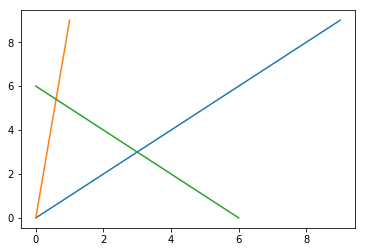

In [2]:
# simple lines plot
plt.plot(np.arange(10))
plt.plot([0, 9])
plt.plot(range(6, -1, -1))

Figures and Subplots

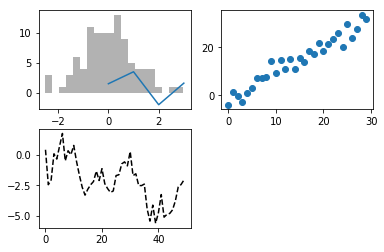

In [3]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
plt.plot([1.5, 3.5, -2, 1.6])

ax2 = fig.add_subplot(2, 2, 2)

ax3 = fig.add_subplot(2, 2, 3)
# k-- means black dashed line
plt.plot(np.random.randn(50).cumsum(), 'k--')

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

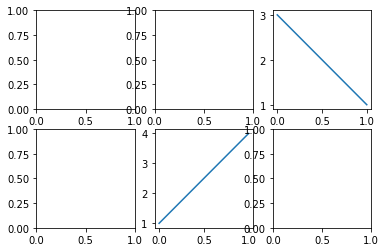

In [4]:
# subplots() simplify the above job
fig, axes = plt.subplots(2, 3)
axes[0, 2].plot([3, 1])
axes[1, 1].plot([1, 4])

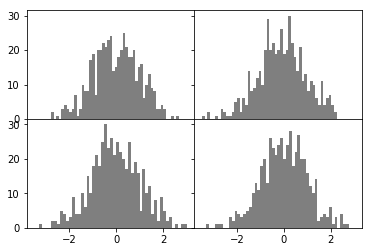

In [5]:
# subplots_adjust()

# sharex, sharey same x,y for all subplots
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

Colors, Markers, and Line Styles

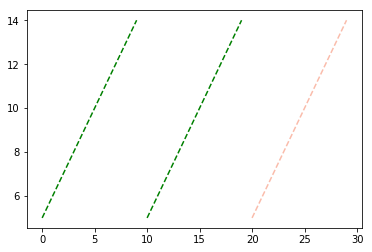

In [6]:
y = range(5, 15)

# green dashes
plt.plot(range(10), y, 'g--')

# same, style and color
plt.plot(range(10, 20), y, linestyle='--', color='g')

# color as hex code
plt.plot(range(20, 30), y, linestyle='--', color='#FABCAB')

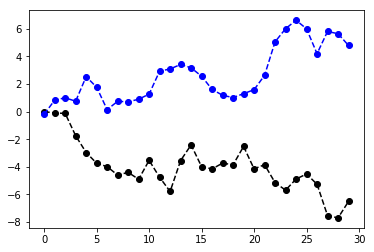

In [7]:
# marker, a (black) dot in a dashed line
plt.plot(np.random.randn(30).cumsum(), 'ko--')

# same, more detailed
plt.plot(np.random.randn(30).cumsum(), color='b', linestyle='dashed', marker='o')

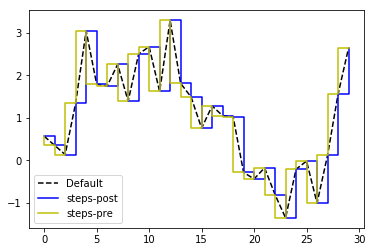

In [8]:
# drawstyle
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'b-', drawstyle='steps-post', label='steps-post')
plt.plot(data, 'y-', drawstyle='steps-pre', label='steps-pre')
plt.legend(loc='best')

Ticks, Labels, and Legends

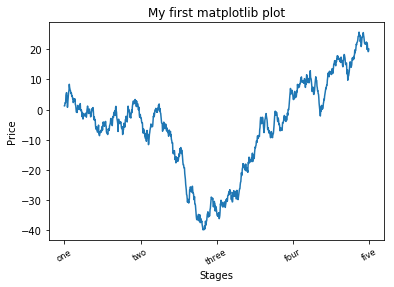

In [9]:
# Setting the title, axis labels, ticks, and ticklabels
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
# ax.set_title('My first matplotlib plot')
# ax.set_xlabel('Stages')
# ax.set_ylabel('Price')
ax.set(**{'title': 'My first matplotlib plot', 'xlabel': 'Stages', 'ylabel': 'Price'})
ax.set_xticks(range(0, 1001, 250))
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.plot(np.random.randn(1000).cumsum())

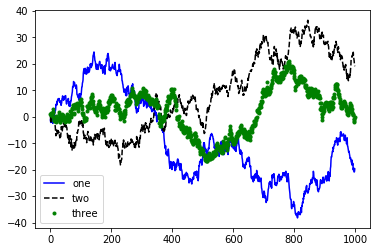

In [10]:
# Adding legends
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'b', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'g.', label='three')
ax.legend(loc='best')

Annotations and Drawing on a Subplot

Text(0.4,0.1,'Hello world!')

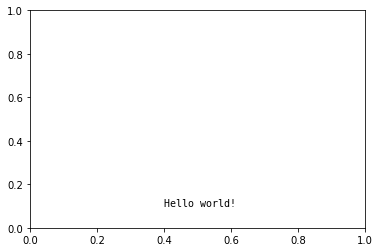

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.4, 0.1, 'Hello world!',family='monospace', fontsize=10)

Text(0.5,1,'Important dates in the 2008-2009 financial crisis')

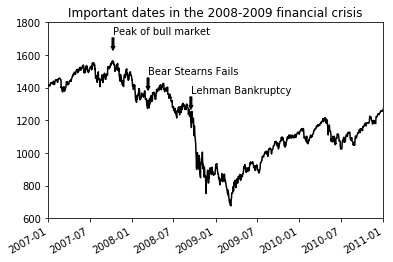

In [12]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,headlength=4),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

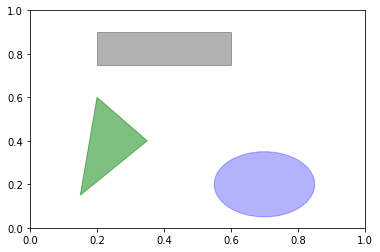

In [13]:
# shapes
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)